In [1]:
import numpy as np
import pandas as pd

In [2]:
train_data = pd.read_csv('risk_analytics_train.csv', index_col = 0, header=0)
test_data = pd.read_csv('risk_analytics_test.csv', index_col = 0, header=0)

In [3]:
print(train_data.shape)
print(test_data.shape)

(614, 12)
(367, 11)


In [4]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [6]:
train_data.describe().round(3)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,599.000,614.000,614.000,592.000,600.00,564.000
mean,0.763,5403.459,1621.246,146.412,342.00,0.842
std,1.015,6109.042,2926.248,85.587,65.12,0.365
min,0.000,150.000,0.000,9.000,12.00,0.000
25%,0.000,2877.500,0.000,100.000,360.00,1.000
50%,0.000,3812.500,1188.500,128.000,360.00,1.000
75%,2.000,5795.000,2297.250,168.000,360.00,1.000
max,3.000,81000.000,41667.000,700.000,480.00,1.000


In [7]:
train_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
# for categorical data

colname = ['Gender','Married','Dependents','Self_Employed','Loan_Amount_Term']

for value in colname:
    train_data[value].fillna(train_data[value].mode()[0], inplace= True)
    test_data[value].fillna(test_data[value].mode()[0], inplace= True)


In [9]:
train_data.isnull().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
# for numeric data

for value in ['LoanAmount']:
    train_data[value].fillna(round(train_data[value].mean(),0), inplace = True)
    test_data[value].fillna(round(test_data[value].mean(),0), inplace= True)

In [11]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       29
Property_Area         0
dtype: int64


In [12]:
# values for credit history 

train_data['Credit_History'].fillna(value = 0, inplace=True)
test_data['Credit_History'].fillna(value = 0, inplace=True)

In [13]:
print(train_data.isnull().sum())
print(test_data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64


In [14]:
# transforming categorical to numerical

from sklearn.preprocessing import LabelEncoder

colname = ['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status']

le = LabelEncoder()
for x in colname:
    train_data[x] = le.fit_transform(train_data[x])


In [15]:
train_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,1,0,0.0,0,0,5849,0.0,146.0,360.0,1.0,2,1
LP001003,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
LP001005,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
LP001006,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
LP001008,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [16]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,0.0,Urban
LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [17]:
# transforming categorical to numerical

from sklearn.preprocessing import LabelEncoder

colname = ['Gender','Married','Education','Self_Employed','Property_Area']

le = LabelEncoder()
for x in colname:
    test_data[x] = le.fit_transform(test_data[x])

In [18]:
test_data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
Loan_ID,,,,,,,,,,,
LP001015,1,1,0.0,0,0,5720,0,110.0,360.0,1.0,2
LP001022,1,1,1.0,0,0,3076,1500,126.0,360.0,1.0,2
LP001031,1,1,2.0,0,0,5000,1800,208.0,360.0,1.0,2
LP001035,1,1,2.0,0,0,2340,2546,100.0,360.0,0.0,2
LP001051,1,0,0.0,1,0,3276,0,78.0,360.0,1.0,2


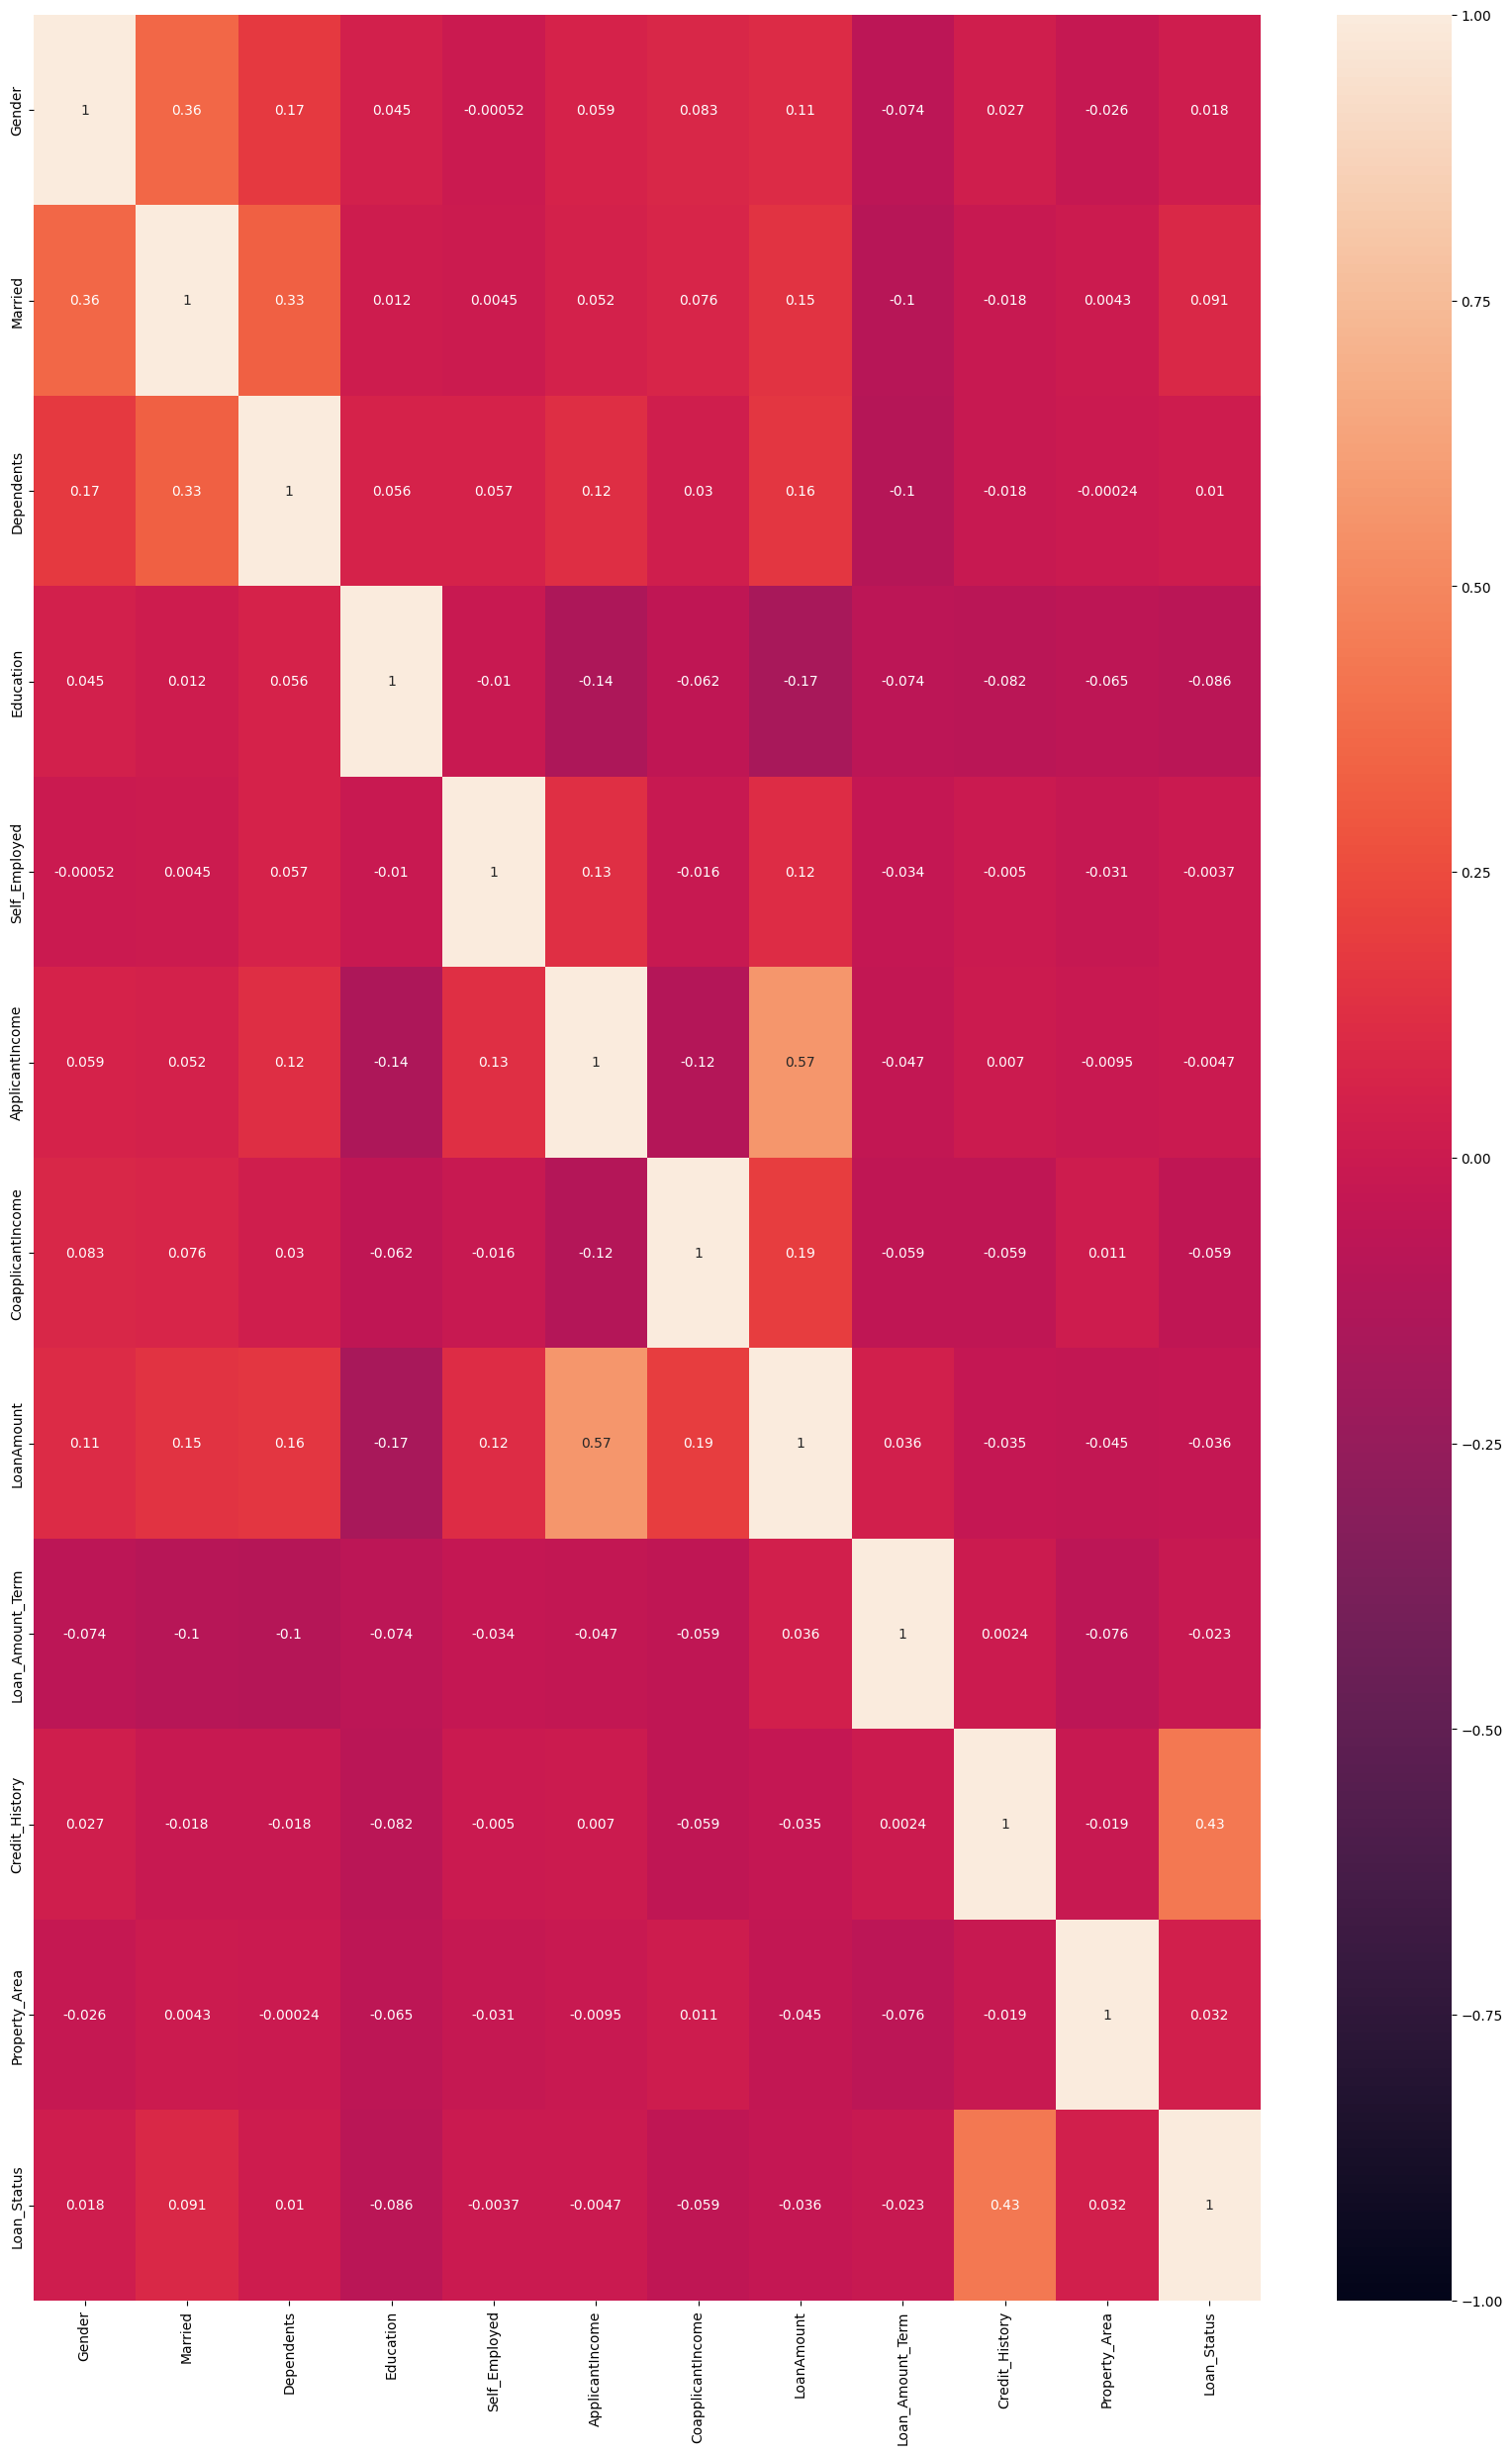

In [29]:
# loan status --- Y = 1, N = 0

corr_df = train_data.corr()
corr_df

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,30))
sns.heatmap(corr_df, vmin = -1.0, vmax = 1.0, annot = True)
plt.show()

## Creating training data and testing datasets and running the model